Exercise 5 
The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. There are more efficient alternatives, like the Voss-McCartney algorithm. Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.

本章中用於產生粉紅噪聲的演算法在概念上很簡單，但計算量卻很大。還有更有效的替代方法，例如Voss-McCartney演算法。研究該方法，實施該方法，計算結果的頻譜，並確認它具有所需的功率和頻率關係。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [2]:
#產生100x5陣列
nrows = 100
ncols = 5

array = np.empty((nrows, ncols)) #先把陣列中的值設為空
array.fill(np.nan)
array[0, :] = np.random.random(ncols) # 第0行隨機給數值
array[:, 0] = np.random.random(nrows) # 第0列隨機給數值
array[0:6] #顯示0~6列

array([[0.15407197, 0.60597423, 0.2365207 , 0.53817637, 0.92085148],
       [0.67097536,        nan,        nan,        nan,        nan],
       [0.62244606,        nan,        nan,        nan,        nan],
       [0.23760594,        nan,        nan,        nan,        nan],
       [0.6590533 ,        nan,        nan,        nan,        nan],
       [0.83737477,        nan,        nan,        nan,        nan]])

下一步是選擇隨機源發生變化的位置。
如果行數為𝑛，第一列的變化數為𝑛，第二列的變化數平均為𝑛/ 2，第三列的變化數平均為𝑛/ 4，以此類推。
所以矩陣中的變化總數平均為2𝑛；由於其中的𝑛在第一列，其他的𝑛在矩陣的其餘部分。
為了放置剩餘的𝑛的變化，我們從幾何分佈中生成隨機列，𝑝= 0.5。如果我們生成的值超過了邊界，我們將其設置為0（所以第一列時額外得到的）。

In [3]:
p = 0.5
n = nrows #(nrows=100)
cols = np.random.geometric(p, n) #隨機
cols[cols >= ncols] = 0 #ncols = 5
cols

array([1, 0, 1, 1, 1, 2, 2, 1, 3, 1, 2, 4, 1, 4, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 1, 1, 1, 0, 4, 4, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       4, 0, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0, 2, 1, 1, 1, 4, 1, 1, 2, 4, 0,
       2, 1, 2, 2, 2, 4, 1, 3, 2, 4, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 1, 0, 3, 4, 1, 1, 1, 1, 2, 3, 2])

在每個列內，我們從均勻分佈中隨機選擇一行。理想情況下，我們會在不替換的情況下進行選擇，但在替換的情況下進行選擇會替代，更容易，這並不重要。

In [4]:
rows = np.random.randint(nrows, size=n) #n = nrows
rows

array([73, 97,  2,  0, 39, 95, 61, 82, 60, 47, 33, 75, 44, 90, 66, 93, 27,
       35, 97, 62, 51, 21, 60, 17, 89, 83,  0, 64,  1, 51, 13, 53, 79, 30,
       79,  2, 27, 70, 96, 92, 88, 17,  3, 44, 36, 62, 44, 53, 86, 44,  5,
       85, 49, 78, 75, 91, 34,  2, 48, 50, 22, 74,  6, 88, 31, 67,  9, 11,
       82, 69, 72, 99, 83, 10, 97, 86, 24, 61, 85, 22, 58, 95, 39, 91, 15,
       16, 82, 19, 22, 21,  6,  8, 90, 88, 76, 73, 78,  6, 67, 62])

隨機放入值。

In [5]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.15407197, 0.19892961, 0.2365207 , 0.53817637, 0.92085148],
       [0.86426753,        nan,        nan,        nan,        nan],
       [0.62244606, 0.99064513,        nan,        nan,        nan],
       [0.23760594,        nan, 0.6494611 ,        nan,        nan],
       [0.6590533 ,        nan,        nan,        nan,        nan],
       [0.83737477, 0.61561547,        nan,        nan,        nan]])

接下來我們要做一個零階保持來填充NaNs。
NumPy不做這個，但Pandas做了。所以我將創建一個DataFrame。

In [6]:
import pandas as pd
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.154072,0.198930,0.236521,0.538176,0.920851
1,0.864268,NaN,NaN,NaN,NaN
2,0.622446,0.990645,NaN,NaN,NaN
3,0.237606,NaN,0.649461,NaN,NaN
4,0.659053,NaN,NaN,NaN,NaN


使用fillna來沿列。

In [7]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.154072,0.198930,0.236521,0.538176,0.920851
1,0.864268,0.198930,0.236521,0.538176,0.920851
2,0.622446,0.990645,0.236521,0.538176,0.920851
3,0.237606,0.990645,0.649461,0.538176,0.920851
4,0.659053,0.990645,0.649461,0.538176,0.920851


把行(row)相加。

In [8]:
total = filled.sum(axis=1)
total.head()

0    2.048550
1    2.758746
2    3.308640
3    3.336740
4    3.758187
dtype: float64

把結果放進wave中。

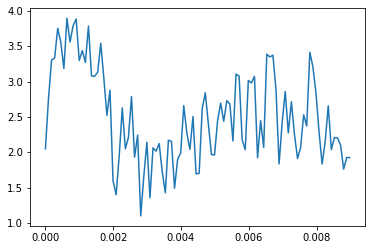

In [9]:
from thinkdsp import Wave
wave = Wave(total.values)
wave.plot()

這是一個函數的整個過程：
產生pink noise利用Voss-McCartney演算法。
nrows代表有多少值要產生，rcols代表多少隨機來源的數量被添加，returns代表NumPy陣列

In [10]:
def voss(nrows, ncols=16):
    
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # 總變化數為nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

要測試它我生成11025個值：

In [11]:
ys = voss(11025)
ys

array([8.15895397, 8.2997196 , 8.00153552, ..., 8.28627499, 8.92138245,
       7.98335178])

把它放進wave中。
unbias 讓平均值移動到 0。
normalize 調整上下值到想要的最大振幅的值。

In [12]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

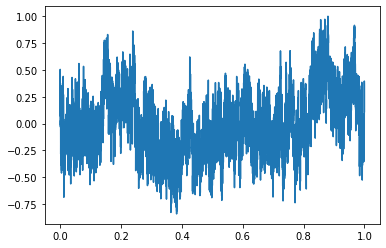

In [13]:
wave.plot()

不出所料，它的隨機性比白噪聲更像白噪聲，但比紅噪聲看起來更隨機。

In [14]:
wave.make_audio()

功率譜。

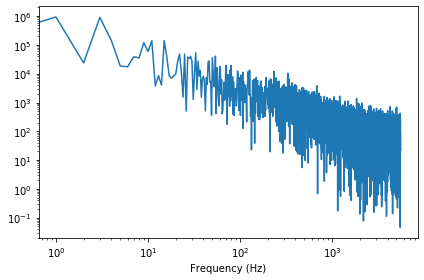

In [15]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
loglog = dict(xscale='log', yscale='log')
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

In [16]:
spectrum.estimate_slope().slope

-1.0305216865823326

估計的斜率接近-1。

通過生成更長的樣本，我們可以更好地了解平均功率譜：

In [17]:
seg_length = 64 * 1024
iters = 100
wave = Wave(voss(seg_length * iters))
len(wave)

6553600

並使用Barlett's method來計算平均值。
make_spectrum 使用 rfft，rfft 的結果我叫它為 hs，它是一個numpy提供的複數的 array，可用複數形式來表示波裡面每個頻率成份的振幅與相位移。 每個在 hs 的值，都對應到一個頻率成份。 

In [19]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

In [20]:
spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0 # 把hs裡頻率=0的元素的值設為 0。
len(spectrum)

32769

它很接近於直線，在最高頻率處有一些曲率。

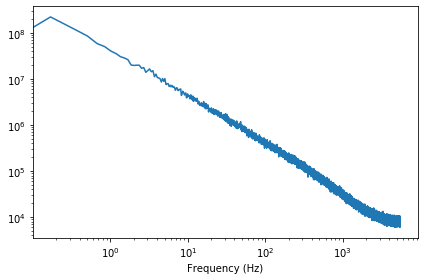

In [21]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

斜率接近-1。

In [22]:
spectrum.estimate_slope().slope

-1.0014185367441042